Цель работы - первичный анализ данных:

- выявление и корректировка ошибок в датасете
- заполнение пустых значений
- оценка распределения переменных
- корреляционный анализ переменных
- подбор коррелирующих переменных для последующего анализа и построения модели машинного обучения


загрузка библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import collections

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [2]:
# Определяем тест Стьюдента
def get_stat_dif5(stud_ds, column):
    cols = stud_ds.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    found = False
    for comb in combinations_all:
        if ttest_ind(stud_ds.loc[stud_ds.loc[:, column] == comb[0], 'score'], 
                        stud_ds.loc[stud_ds.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            found = True
            break
            
    if found == False:
        print('Не найдены статистически значимые различия для колонки', column)

In [3]:
# Определяем функцию для построения boxplot
def get_boxplot(stud_ds, column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_ds.loc[students.loc[:, column].isin(stud_ds.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [4]:
# заводим список для хранения наименований столбцов с переменными, которые оказывают влияние на переменную 'score'
score_releated_data = []

загрузка данных из файла

In [5]:
students = pd.read_csv('stud_math.csv')

In [6]:
display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [7]:
# переименуем столбец "studytime_granular "
students.rename(columns = {'studytime, granular':'studytime_granular'}, inplace = True)
#неизвестная колонка 'studytime_granular', проверим что в ней:.
students.studytime_granular.unique()


array([ -6.,  -9.,  -3.,  nan, -12.])

In [8]:
# колонки "studytime_granular" нет в описанной структуре данных, удаляем как ненужную
students.drop(['studytime_granular'], inplace = True, axis = 1)
# проверим название столбцов
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

In [9]:
# приведем наименование столбцов к строковым буквам
students.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score']

In [10]:
# проверяем заполнение переменной 'score'
students.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

In [11]:
# убираем строки с пропущенными оценками, тк именно оценка является обязательной переменной для нашего анализа
students = students.dropna(subset=['score'])
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 29 columns):
school        389 non-null object
sex           389 non-null object
age           389 non-null int64
address       374 non-null object
famsize       362 non-null object
pstatus       344 non-null object
medu          386 non-null float64
fedu          365 non-null float64
mjob          370 non-null object
fjob          353 non-null object
reason        372 non-null object
guardian      358 non-null object
traveltime    361 non-null float64
studytime     382 non-null float64
failures      367 non-null float64
schoolsup     380 non-null object
famsup        351 non-null object
paid          350 non-null object
activities    375 non-null object
nursery       374 non-null object
higher        369 non-null object
internet      355 non-null object
romantic      358 non-null object
famrel        362 non-null float64
freetime      380 non-null float64
goout         382 non-null float64
heal

In [12]:
# проверим количество незаполненных данных
students.isna().sum()

school         0
sex            0
age            0
address       15
famsize       27
pstatus       45
medu           3
fedu          24
mjob          19
fjob          36
reason        17
guardian      31
traveltime    28
studytime      7
failures      22
schoolsup      9
famsup        38
paid          39
activities    14
nursery       15
higher        20
internet      34
romantic      31
famrel        27
freetime       9
goout          7
health        15
absences      11
score          0
dtype: int64

проверим столбцы на корректность данных и при необходимости скорректируем


In [13]:
# проверяем уникальные значения
students.school.unique()

array(['GP', 'MS'], dtype=object)

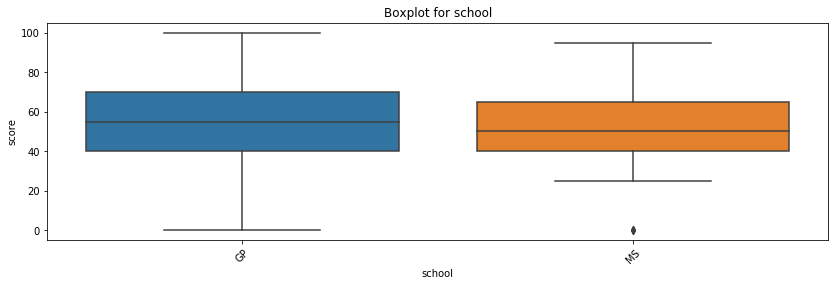

In [14]:
get_boxplot(students, 'school')

распределение для переменной "school" нормальное, выбросов нет .пропущенных значений нет

In [15]:
# проверяем через тест Стьюдента
get_stat_dif5(students, 'school')

Не найдены статистически значимые различия для колонки school


Корреляции между переменными 'school' и 'score' не найдено

In [16]:
# проверяем уникальные значения
students.sex.unique()

array(['F', 'M'], dtype=object)

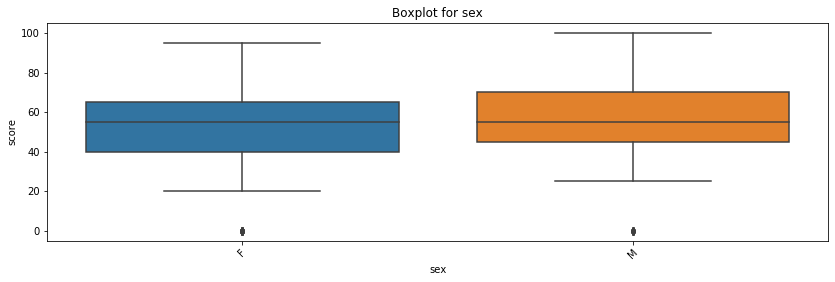

In [17]:
get_boxplot(students, 'sex')

распределение для переменной "sex" нормальное, выбросов нет .пропущенных значений нет

In [18]:
# проверяем через тест Стьюдента
get_stat_dif5(students, 'sex')

Не найдены статистически значимые различия для колонки sex


Корреляции между переменными 'sex' и 'score' не найдено

In [19]:
# проверяем уникальные значения
students.age.unique()

array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64)

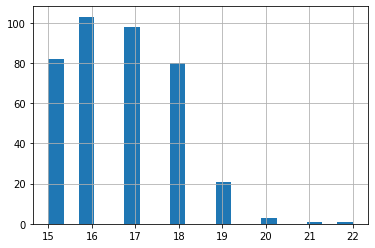

In [20]:
students.age.hist(bins = 20)

распределение для переменной "sex" нормальное, выбросов нет .пропущенных значений нет

In [21]:
# проверяем через тест Стьюдента
get_stat_dif5(students, 'age')

Не найдены статистически значимые различия для колонки age


C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [22]:
# проверим корреляцию данных 'age' и'score'
students[['age','score']].corr()

,age,score
age,1.000000,-0.155726
score,-0.155726,1.000000


In [23]:
# проверяем уникальные значения
students.address.unique()

array(['U', nan, 'R'], dtype=object)

In [24]:
# заменим пустые значения на "NA" (нет ответа)
students.address = students.address.fillna('NA')
students.address.unique()

array(['U', 'NA', 'R'], dtype=object)

In [25]:
# формируем отдельный датасет удалив даные с незаполненными адресами
students_address = students[students.address != 'NA']
students_address.address.unique()

array(['U', 'R'], dtype=object)

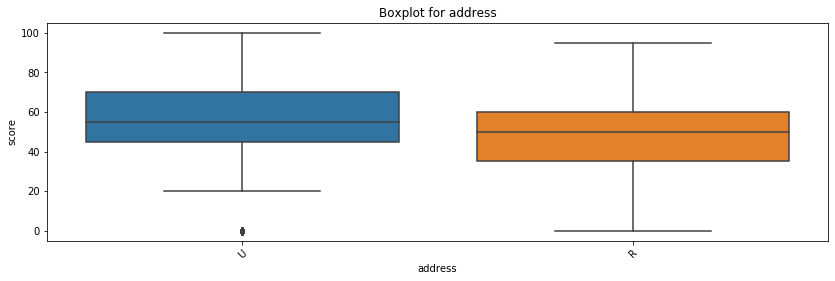

In [26]:
get_boxplot(students_address, 'address')

распределение для переменной "address" нормальное, выбросов нет .пропущенных значений удалены

In [27]:
# проверяем через тест Стьюдента
get_stat_dif5(students_address, 'address')

Найдены статистически значимые различия для колонки address


Корреляции между переменными 'address' и 'score' не найдено

# famsize

In [28]:
# проверяем уникальные значения
students.famsize.unique()

array([nan, 'GT3', 'LE3'], dtype=object)

In [29]:
# заменим пустые значения на "NA" (нет ответа)
students.famsize = students.famsize.fillna('NA')
students.famsize.unique()

array(['NA', 'GT3', 'LE3'], dtype=object)

In [30]:
# формируем отдельный датасет удалив даные с незаполненными данными о размере семьи
students_famsize = students[students.famsize != 'NA']
students_famsize.famsize.unique()

array(['GT3', 'LE3'], dtype=object)

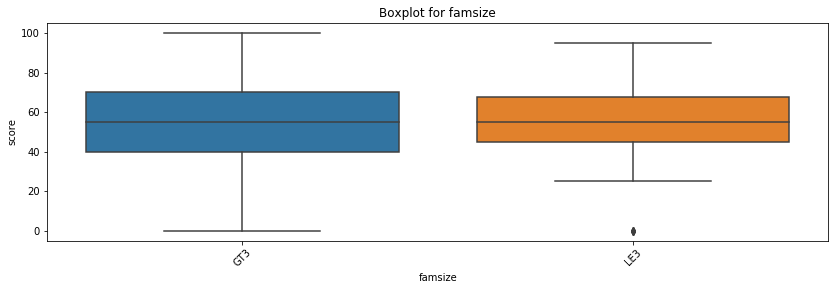

In [31]:
get_boxplot(students_famsize, 'famsize')

распределение для переменной "famsize" нормальное, выбросов нет, пропущенных значений удалены

In [32]:
# проверяем через тест Стьюдента
get_stat_dif5(students_famsize, 'famsize')

Не найдены статистически значимые различия для колонки famsize


# pstatus

In [33]:
# проверяем уникальные значения
students.pstatus.unique() 

array(['A', nan, 'T'], dtype=object)

In [34]:
# заменим пустые значения на "NA" (нет ответа)
students.pstatus = students.pstatus.fillna('NA')
students.pstatus.unique()

array(['A', 'NA', 'T'], dtype=object)

In [35]:
# формируем отдельный датасет удалив даные с незаполненными данными 
students_pstatus = students[students.pstatus != 'NA']
students_pstatus.pstatus.unique()

array(['A', 'T'], dtype=object)

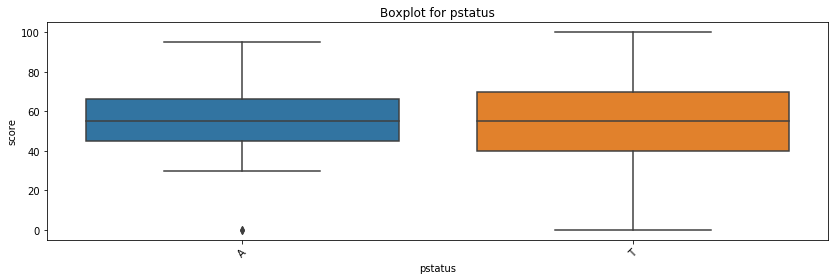

In [36]:
get_boxplot(students_pstatus, 'pstatus')

распределение для переменной "famsize" нормальное, выбросов нет, пропущенных значений удалены

In [37]:
# проверяем через тест Стьюдента
get_stat_dif5(students_pstatus, 'pstatus')

Не найдены статистически значимые различия для колонки pstatus


# medu

In [38]:
# проверяем уникальные значения
students.medu.unique() 

array([ 4.,  1.,  3.,  2., nan,  0.])

In [39]:
# заменим пустые значения на "1000" (нет ответа)
students.medu = students.medu.fillna(1000)
students.medu.unique()

array([   4.,    1.,    3.,    2., 1000.,    0.])

In [40]:
# формируем отдельный датасет удалив даные с незаполненными данными 
students_medu = students[students.medu != 1000]
students_medu.medu.unique()

array([4., 1., 3., 2., 0.])

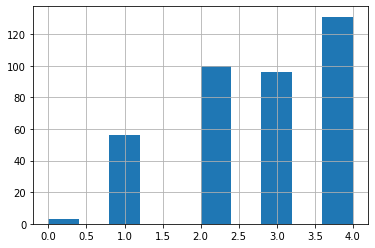

In [41]:
students_medu.medu.hist(bins = 10)

распределение для переменной "medu" нормальное, выбросов нет, пропущенных значений удалены

In [42]:
# проверяем через тест Стьюдента
get_stat_dif5(students_medu, 'medu')

Найдены статистически значимые различия для колонки medu


Переменные "medu" влияют на данные "score"


In [43]:
# В столбце "medu" были найдены статистически значимые различия, а значит эти параметры влияют на переменную 'score'
score_releated_data.append('medu')

In [44]:
students_medu[['medu','score']].corr()

,medu,score
medu,1.000000,0.213349
score,0.213349,1.000000


# fedu

In [45]:
# проверяем уникальные значения
students.fedu.unique()

array([ 4.,  1.,  2.,  3., 40., nan,  0.])

In [46]:
# заменим пустые значения на "1000" (нет ответа)
students.fedu = students.fedu.fillna(1000)
students.fedu.unique()

array([   4.,    1.,    2.,    3.,   40., 1000.,    0.])

In [47]:
# Заменяем 40 на 4 (предполагая опечатку при вводе)
students.fedu = students.fedu.astype(float).apply(lambda x: 4. if x == 40. else x)
students.fedu.unique()

array([   4.,    1.,    2.,    3., 1000.,    0.])

In [48]:
# формируем отдельный датасет удалив даные с незаполненными данными 
students_fedu = students[students.fedu != 1000]
students_fedu.fedu.unique()

array([4., 1., 2., 3., 0.])

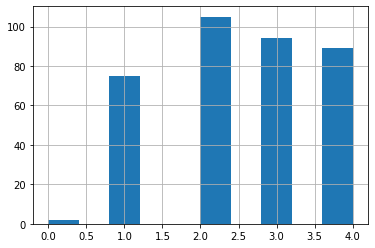

In [49]:
students_fedu.fedu.hist(bins = 10)

In [50]:
# проверяем через тест Стьюдента
get_stat_dif5(students_fedu, 'fedu')

Не найдены статистически значимые различия для колонки fedu


In [51]:
# проверяем уникальные значения
students.mjob.unique()

array(['at_home', 'health', 'other', 'services', 'teacher', nan],
      dtype=object)

In [52]:
# заменим пустые значения на "NA" (нет ответа)
students.mjob = students.mjob.fillna('NA')
students.mjob.unique()

array(['at_home', 'health', 'other', 'services', 'teacher', 'NA'],
      dtype=object)

In [53]:
# формируем отдельный датасет удалив даные с незаполненными данными о размере семьи
students_mjob = students[students.mjob != 'NA']
students_mjob.mjob.unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

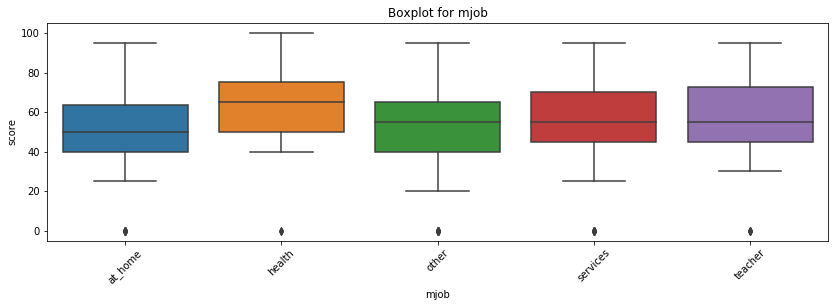

In [54]:
get_boxplot(students_mjob, 'mjob')

In [55]:
# проверяем через тест Стьюдента
get_stat_dif5(students_mjob, 'mjob')

Найдены статистически значимые различия для колонки mjob


In [56]:
# В столбце "medu" были найдены статистически значимые различия, а значит эти параметры влияют на переменную 'score'
score_releated_data.append('mjob')
score_releated_data

['medu', 'mjob']

In [57]:
# проверяем уникальные значения
students.fjob.unique()

array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
      dtype=object)

In [58]:
# заменим пустые значения на "NA" (нет ответа)
students.fjob = students.fjob.fillna('NA')
students.fjob.unique()

array(['teacher', 'other', 'NA', 'health', 'services', 'at_home'],
      dtype=object)

In [59]:
# формируем отдельный датасет удалив даные с незаполненными данными о размере семьи
students_fjob = students[students.fjob != 'NA']
students_fjob.fjob.unique()

array(['teacher', 'other', 'health', 'services', 'at_home'], dtype=object)

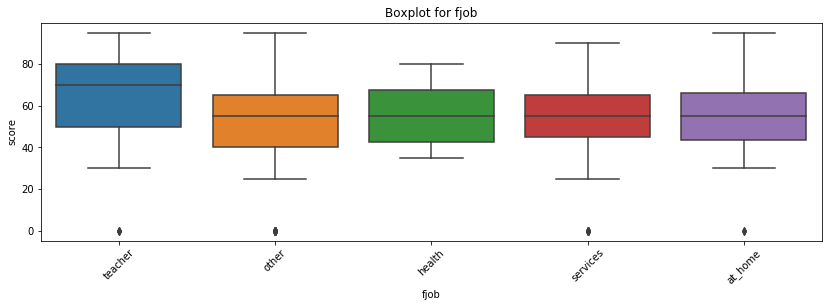

In [60]:
get_boxplot(students_fjob, 'fjob')

In [61]:
# проверяем через тест Стьюдента
get_stat_dif5(students_fjob, 'fjob')

Не найдены статистически значимые различия для колонки fjob


In [62]:
# проверяем уникальные значения
students.reason.unique()

array(['course', 'other', 'home', 'reputation', nan], dtype=object)

In [63]:
students.reason = students.reason.fillna('NA')
students.reason.unique()

array(['course', 'other', 'home', 'reputation', 'NA'], dtype=object)

In [64]:
# формируем отдельный датасет удалив даные с незаполненными данными о размере семьи
students_reason = students[students.reason != 'NA']
students_reason.reason.unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

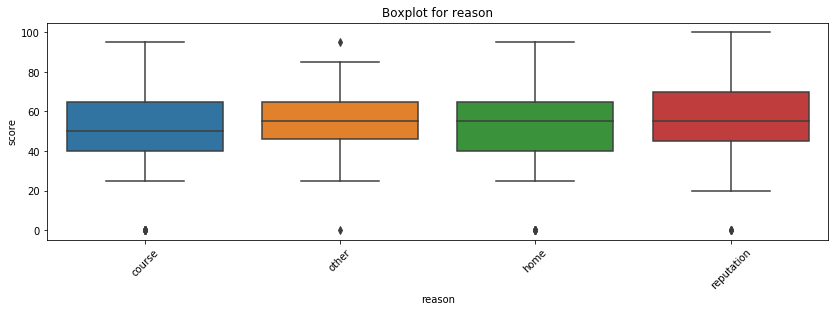

In [65]:
get_boxplot(students_reason, 'reason')

In [66]:
# проверяем через тест Стьюдента
get_stat_dif5(students_reason, 'reason')

Не найдены статистически значимые различия для колонки reason


In [67]:
# проверяем уникальные значения
students.guardian.unique()

array(['mother', 'father', 'other', nan], dtype=object)

In [68]:
students.guardian = students.guardian.fillna('NA')
students.guardian.unique()

array(['mother', 'father', 'other', 'NA'], dtype=object)

In [69]:
# формируем отдельный датасет удалив даные с незаполненными данными о размере семьи
students_guardian = students[students.guardian != 'NA']
students_guardian.guardian.unique()

array(['mother', 'father', 'other'], dtype=object)

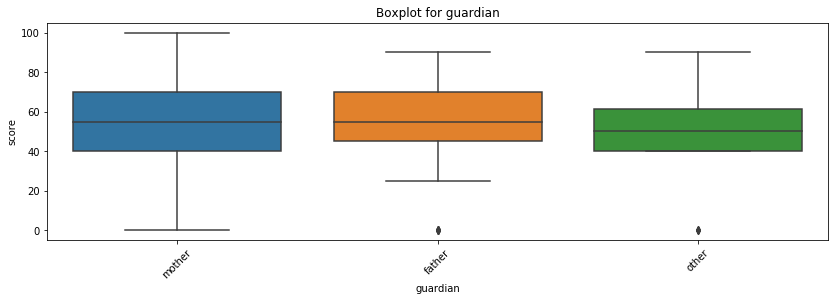

In [70]:
get_boxplot(students_guardian, 'guardian')

In [71]:
# проверяем через тест Стьюдента
get_stat_dif5(students_guardian, 'guardian')

Не найдены статистически значимые различия для колонки guardian


# traveltime   

In [72]:
# проверяем уникальные значения
students.traveltime.unique()

array([ 2.,  1.,  3., nan,  4.])

In [73]:
# заменим пустые значения на "1000" (нет ответа)
students.traveltime = students.traveltime.fillna(1000)
students.traveltime.unique()

array([   2.,    1.,    3., 1000.,    4.])

In [74]:
# формируем отдельный датасет удалив даные с незаполненными данными о размере семьи
students_traveltime = students[students.traveltime != 1000]
students_traveltime.traveltime.unique()

array([2., 1., 3., 4.])

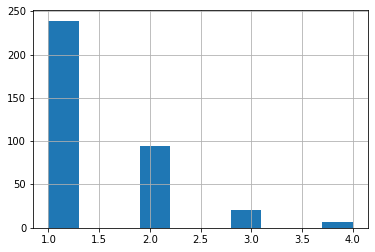

In [75]:
students_traveltime.traveltime.hist(bins = 10)

In [76]:
# проверяем через тест Стьюдента
get_stat_dif5(students_traveltime, 'traveltime')

Не найдены статистически значимые различия для колонки traveltime


In [77]:
students_traveltime[['traveltime','score']].corr()

,traveltime,score
traveltime,1.000000,-0.070559
score,-0.070559,1.000000


# studytime   

In [78]:
# проверяем уникальные значения
students.studytime.unique()

array([ 2.,  3.,  1., nan,  4.])

In [79]:
# заменим пустые значения на "1000" (нет ответа)
students.studytime = students.studytime.fillna(1000)
students.studytime.unique()

array([   2.,    3.,    1., 1000.,    4.])

In [80]:
# формируем отдельный датасет удалив даные с незаполненными данными о размере семьи
students_studytime = students[students.studytime != 1000]
students_studytime.studytime.unique()

array([2., 3., 1., 4.])

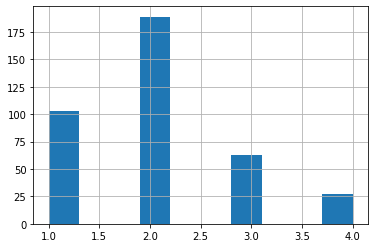

In [81]:
students_studytime.studytime.hist(bins = 10)

In [82]:
# проверяем через тест Стьюдента
get_stat_dif5(students_studytime, 'studytime')

Не найдены статистически значимые различия для колонки studytime


# failures 

In [83]:
# проверяем уникальные значения
students.failures.unique()

array([ 0.,  3., nan,  2.,  1.])

In [84]:
# заменим пустые значения на "1000" (нет ответа)
students.failures = students.failures.fillna(1000)
students.failures.unique()

array([   0.,    3., 1000.,    2.,    1.])

In [85]:
# формируем отдельный датасет удалив даные с незаполненными данными о размере семьи
students_failures = students[students.failures != 1000]
students_failures.failures.unique()

array([0., 3., 2., 1.])

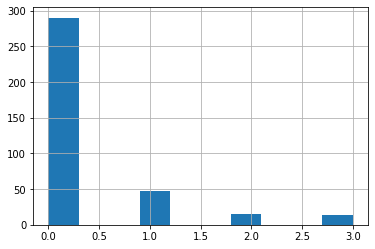

In [86]:
students_failures.failures.hist(bins = 10)

In [87]:
# проверяем через тест Стьюдента
get_stat_dif5(students_failures, 'failures')

Найдены статистически значимые различия для колонки failures


In [88]:
# В столбце "failures" были найдены статистически значимые различия, а значит эти параметры влияют на переменную 'score'
score_releated_data.append('failures')
score_releated_data

['medu', 'mjob', 'failures']

In [89]:
students_failures[['failures','score']].corr()

,failures,score
failures,1.000000,-0.344338
score,-0.344338,1.000000


# schoolsup 

In [90]:
# проверяем уникальные значения
students.schoolsup.unique()

array(['yes', 'no', nan], dtype=object)

In [91]:
# заменим пустые значения на "NA" (нет ответа)
students.schoolsup = students.schoolsup.fillna('NA')
students.schoolsup.unique()

array(['yes', 'no', 'NA'], dtype=object)

In [92]:
# формируем отдельный датасет удалив даные с незаполненными данными о размере семьи
students_schoolsup = students[students.schoolsup  != 'NA']
students_schoolsup.schoolsup.unique()

array(['yes', 'no'], dtype=object)

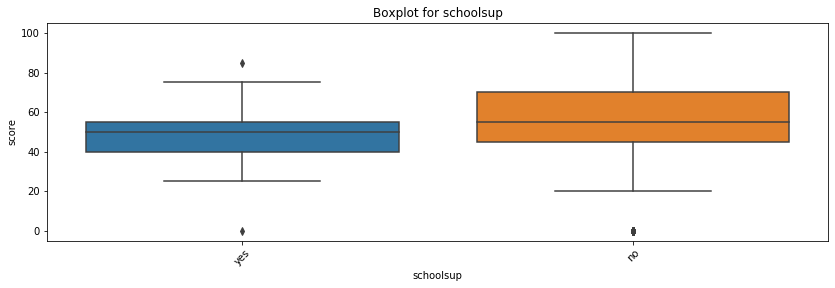

In [93]:
get_boxplot(students_schoolsup, 'schoolsup')

In [94]:
# проверяем через тест Стьюдента
get_stat_dif5(students_schoolsup, 'schoolsup')

Не найдены статистически значимые различия для колонки schoolsup


# famsup   

In [95]:
# проверяем на уникальные значения
students.famsup.unique() 

array(['no', 'yes', nan], dtype=object)

In [96]:
students.famsup = students.famsup.fillna('NA')
students.famsup.unique()

array(['no', 'yes', 'NA'], dtype=object)

In [97]:
# проверим распределение по уникальным значениям
students.groupby('famsup').famsup.count()

famsup
NA      38
no     135
yes    216
Name: famsup, dtype: int64

In [98]:
# формируем отдельный датасет удалив даные с незаполненными данными о размере семьи
students_famsup = students[students.famsup  != 'NA']
students_famsup.famsup.unique()

array(['no', 'yes'], dtype=object)

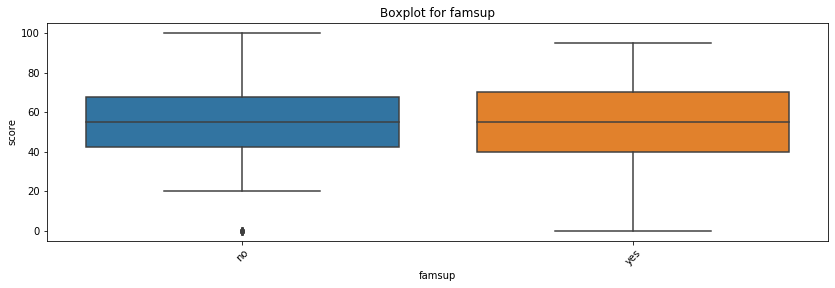

In [99]:
get_boxplot(students_famsup, 'famsup')

In [100]:
# проверяем через тест Стьюдента
get_stat_dif5(students_famsup, 'famsup')

Не найдены статистически значимые различия для колонки famsup


# paid 

In [101]:
# проверяем на уникальные значения
students.paid.unique() 

array(['no', nan, 'yes'], dtype=object)

In [102]:
# заменим пустые значения на "NA" (нет ответа)
students.paid = students.paid.fillna('NA')
students.paid.unique()

array(['no', 'NA', 'yes'], dtype=object)

In [103]:
# проверим распределение по уникальным значениям
students.groupby('paid').paid.count()

paid
NA      39
no     197
yes    153
Name: paid, dtype: int64

In [104]:
# формируем отдельный датасет удалив даные с незаполненными данными о размере семьи
students_paid = students[students.paid  != 'NA']
students_paid.paid.unique()

array(['no', 'yes'], dtype=object)

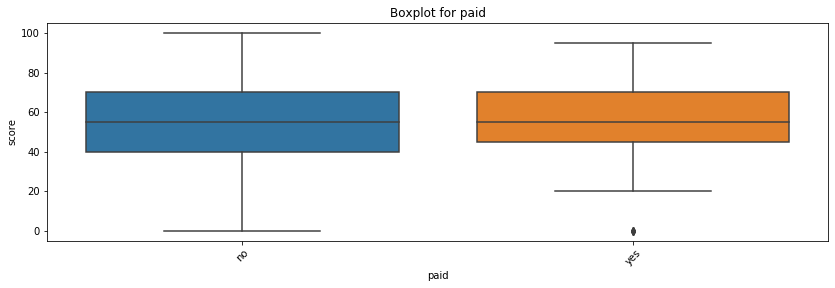

In [105]:
get_boxplot(students_paid, 'paid')

In [106]:
# проверяем через тест Стьюдента
get_stat_dif5(students_paid, 'paid')

Не найдены статистически значимые различия для колонки paid


# activities

In [107]:
students.activities.unique() 

array(['no', 'yes', nan], dtype=object)

In [108]:
# заменим пустые значения на "NA" (нет ответа)
students.activities = students.activities.fillna('NA')
students.activities.unique()

array(['no', 'yes', 'NA'], dtype=object)

In [109]:
# формируем отдельный датасет удалив даные с незаполненными данными о размере семьи
students_activities = students[students.activities  != 'NA']
students_activities.activities.unique()

array(['no', 'yes'], dtype=object)

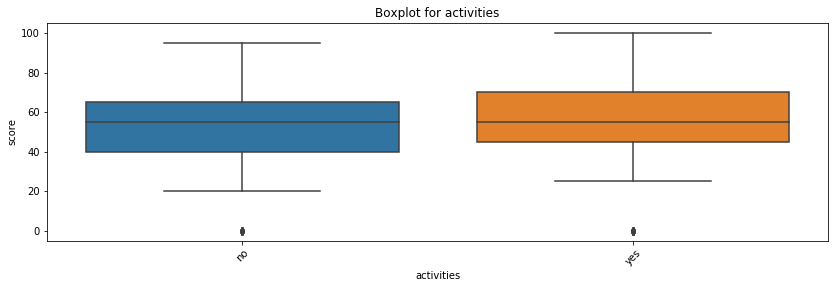

In [110]:
get_boxplot(students_activities, 'activities')

In [111]:
# проверяем через тест Стьюдента
get_stat_dif5(students_activities, 'activities')

Не найдены статистически значимые различия для колонки activities


# nursery

In [112]:
students.nursery.unique() 

array(['yes', 'no', nan], dtype=object)

In [113]:
# заменим пустые значения на "NA" (нет ответа)
students.nursery = students.nursery.fillna('NA')
students.nursery.unique()

array(['yes', 'no', 'NA'], dtype=object)

In [114]:
# формируем отдельный датасет удалив даные с незаполненными данными о размере семьи
students_nursery = students[students.nursery  != 'NA']
students_nursery.nursery.unique()

array(['yes', 'no'], dtype=object)

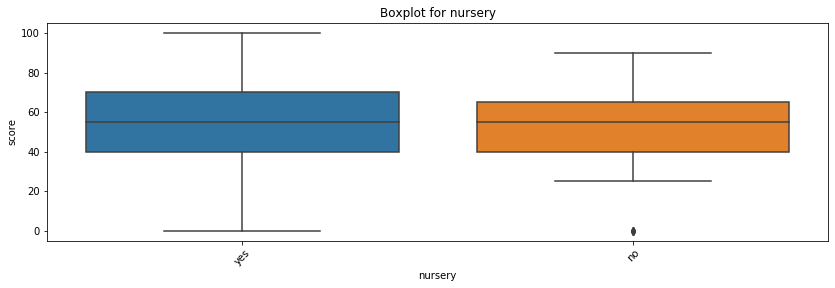

In [115]:
get_boxplot(students_nursery, 'nursery')

In [116]:
# проверяем через тест Стьюдента
get_stat_dif5(students_nursery, 'nursery')

Не найдены статистически значимые различия для колонки nursery


# higher

In [117]:
students.higher.unique() 

array(['yes', nan, 'no'], dtype=object)

In [118]:
# заменим пустые значения на "NA" (нет ответа)
students.higher = students.higher.fillna('NA')
students.higher.unique()

array(['yes', 'NA', 'no'], dtype=object)

In [119]:
# формируем отдельный датасет удалив даные с незаполненными данными о размере семьи
students_higher = students[students.higher  != 'NA']
students_higher.higher.unique()

array(['yes', 'no'], dtype=object)

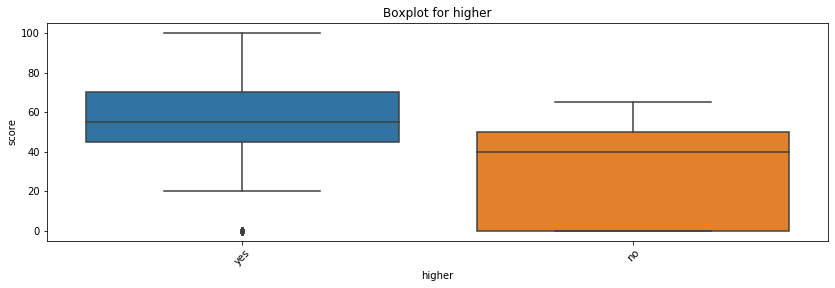

In [120]:
get_boxplot(students_higher, 'higher')

In [121]:
# проверяем через тест Стьюдента
get_stat_dif5(students_higher, 'higher')

Найдены статистически значимые различия для колонки higher


In [122]:
# В столбце "higher" были найдены статистически значимые различия, а значит эти параметры влияют на переменную 'score'
score_releated_data.append('higher')
score_releated_data

['medu', 'mjob', 'failures', 'higher']

# internet 

In [123]:
students.internet.unique() 

array([nan, 'yes', 'no'], dtype=object)

In [124]:
# заменим пустые значения на "NA" (нет ответа)
students.internet = students.internet.fillna('NA')
students.internet.unique()

array(['NA', 'yes', 'no'], dtype=object)

In [125]:
# формируем отдельный датасет удалив даные с незаполненными данными о размере семьи
students_internet = students[students.internet  != 'NA']
students_internet.internet.unique()

array(['yes', 'no'], dtype=object)

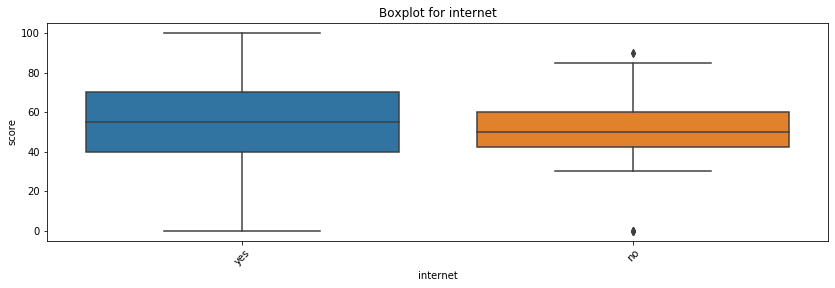

In [126]:
get_boxplot(students_internet, 'internet')

In [127]:
# проверяем через тест Стьюдента
get_stat_dif5(students_internet, 'internet')

Не найдены статистически значимые различия для колонки internet


# romantic

In [128]:
students.romantic.unique() 

array(['no', nan, 'yes'], dtype=object)

In [129]:
# заменим пустые значения на "NA" (нет ответа)
students.romantic = students.romantic.fillna('NA')
students.romantic.unique()

array(['no', 'NA', 'yes'], dtype=object)

In [130]:
# формируем отдельный датасет удалив даные с незаполненными данными о размере семьи
students_romantic = students[students.romantic  != 'NA']
students_romantic.romantic.unique()

array(['no', 'yes'], dtype=object)

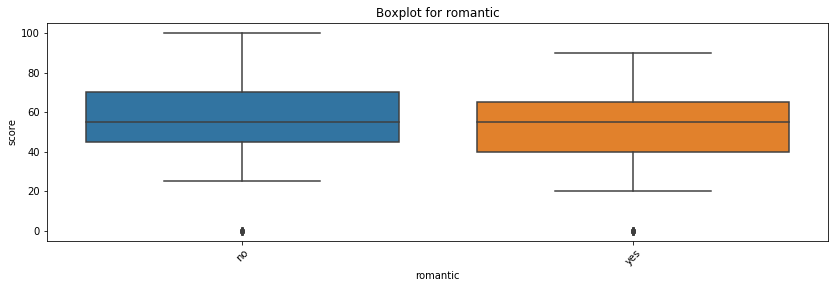

In [131]:
get_boxplot(students_romantic, 'romantic')

In [132]:
# проверяем через тест Стьюдента
get_stat_dif5(students_romantic, 'romantic')

Найдены статистически значимые различия для колонки romantic


In [133]:
# В столбце "romantic" были найдены статистически значимые различия, а значит эти параметры влияют на переменную 'score'
score_releated_data.append('romantic')
score_releated_data

['medu', 'mjob', 'failures', 'higher', 'romantic']

# famrel  


In [134]:
students.famrel.unique() 

array([ 4.,  5.,  3., nan, -1.,  2.,  1.])

In [135]:
# заменим пустые значения на "1000" (нет ответа)
students.famrel = students.famrel.fillna(1000)
students.famrel.unique()

array([   4.,    5.,    3., 1000.,   -1.,    2.,    1.])

In [136]:
# Заменяем -1 на 1 (предполагая опечатку при вводе)
students.famrel = students.famrel.astype(float).apply(lambda x: 1. if x == -1. else x)
students.famrel.unique()

array([   4.,    5.,    3., 1000.,    1.,    2.])

In [137]:
# формируем отдельный датасет удалив даные с незаполненными данными о размере семьи
students_famrel = students[students.famrel  != 1000]
students_famrel.famrel.unique()

array([4., 5., 3., 1., 2.])

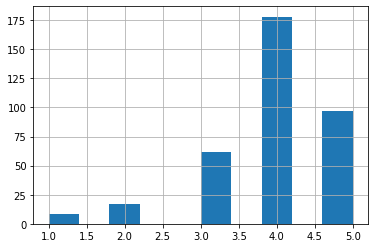

In [138]:
students_famrel.famrel.hist(bins = 10)

In [139]:
# проверяем через тест Стьюдента
get_stat_dif5(students_famrel, 'famrel')

Не найдены статистически значимые различия для колонки famrel


# freetime  

In [140]:
students.freetime.unique() 

array([ 3.,  2.,  4.,  1.,  5., nan])

In [141]:
# заменим пустые значения на "1000" (нет ответа)
students.freetime = students.freetime.fillna(1000)
students.freetime.unique()

array([   3.,    2.,    4.,    1.,    5., 1000.])

In [142]:
# формируем отдельный датасет удалив даные с незаполненными данными о размере семьи
students_freetime = students[students.freetime  != 1000]
students_freetime.freetime.unique()

array([3., 2., 4., 1., 5.])

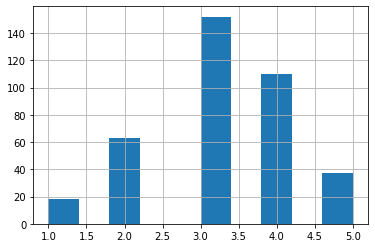

In [143]:
students_freetime.freetime.hist(bins = 10)

In [144]:
# проверяем через тест Стьюдента
get_stat_dif5(students_freetime, 'freetime')

Не найдены статистически значимые различия для колонки freetime


# goout

In [145]:
students.goout.unique()

array([ 4.,  3.,  2.,  1.,  5., nan])

In [146]:
# заменим пустые значения на "1000" (нет ответа)
students.goout = students.goout.fillna(1000)
students.goout.unique()

array([   4.,    3.,    2.,    1.,    5., 1000.])

In [147]:
# формируем отдельный датасет удалив даные с незаполненными данными о размере семьи
students_goout = students[students.goout  != 1000]
students_goout.goout.unique()

array([4., 3., 2., 1., 5.])

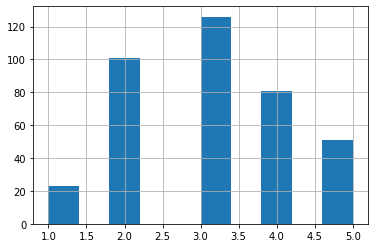

In [148]:
students_goout.goout.hist(bins = 10)

In [149]:
# проверяем через тест Стьюдента
get_stat_dif5(students_goout, 'goout')

Найдены статистически значимые различия для колонки goout


In [150]:
# В столбце "goout" были найдены статистически значимые различия, а значит эти параметры влияют на переменную 'score'
score_releated_data.append('goout')
score_releated_data

['medu', 'mjob', 'failures', 'higher', 'romantic', 'goout']

# health

In [151]:
students.health.unique()

array([ 3.,  5.,  1.,  2.,  4., nan])

In [152]:
# заменим пустые значения на "1000" (нет ответа)
students.health = students.health.fillna(1000)
students.health.unique()

array([   3.,    5.,    1.,    2.,    4., 1000.])

In [153]:
# формируем отдельный датасет удалив даные с незаполненными данными о размере семьи
students_health = students[students.health  != 1000]
students_health.health.unique()

array([3., 5., 1., 2., 4.])

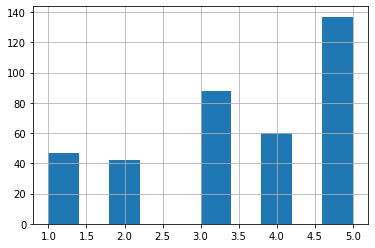

In [154]:
students_health.health.hist(bins = 10)

In [155]:
# проверяем через тест Стьюдента
get_stat_dif5(students_health, 'health')

Не найдены статистически значимые различия для колонки health


# absences  

In [156]:
students.absences.unique()

array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,  14.,   7.,   8.,  25.,
        12.,  54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,
        22.,   3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,
        40.,  23.,  17., 212.])

In [157]:
# заменим пустые значения на "1000" (нет ответа)
students.absences = students.absences.fillna(1000)
students.absences.unique()

array([   6.,    4.,   10.,    2.,    0.,   16., 1000.,   14.,    7.,
          8.,   25.,   12.,   54.,   18.,   26.,   20.,   56.,   24.,
         28.,    5.,   13.,   15.,   22.,    3.,  385.,   21.,    1.,
         75.,   30.,   19.,    9.,   11.,   38.,   40.,   23.,   17.,
        212.])

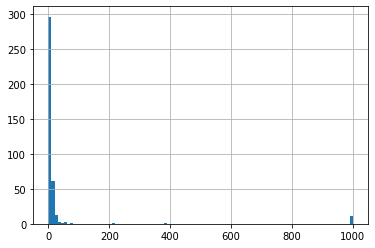

In [158]:
students.absences.hist(bins = 100)

In [159]:
# все значения переменной "absence" >100 будем считать выбросами иисключим из выборки

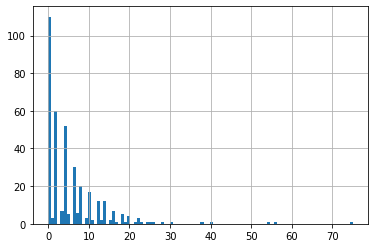

In [160]:
students_absence = students[students.absences  < 100]
students_absence.absences.hist(bins = 100)

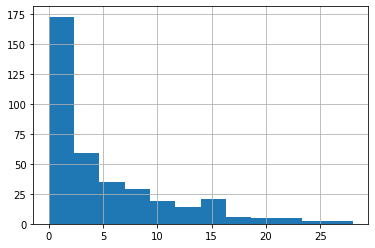

In [161]:
# скорее всего можно отбросить как выбросы все значения переменной "absence" >30
students_absence30 = students[students.absences  < 30]
students_absence30.absences.hist(bins = 12)

In [162]:
# проверяем через тест Стьюдента
get_stat_dif5(students_absence30, 'absences')

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Не найдены статистически значимые различия для колонки absences


# итоговый список столбцов, переменные которых оказывают влияние на переменную score

In [163]:
score_releated_data

['medu', 'mjob', 'failures', 'higher', 'romantic', 'goout']

# итоговый датафрейм, который можно использовать в дальнейшем

In [164]:
students = students[['medu', 'mjob', 'failures', 'higher', 'romantic', 'goout', 'score']]

In [165]:
students 

,medu,mjob,failures,higher,romantic,goout,score
0,4.0,at_home,0.0,yes,no,4.0,30.0
1,1.0,at_home,0.0,yes,no,3.0,30.0
2,1.0,at_home,3.0,yes,NA,2.0,50.0
3,4.0,health,0.0,yes,yes,2.0,75.0
4,3.0,other,0.0,yes,no,2.0,50.0
...,...,...,...,...,...,...,...
390,2.0,services,2.0,yes,no,4.0,45.0
391,3.0,services,0.0,yes,no,5.0,80.0
392,1.0,other,3.0,NA,no,3.0,35.0
393,3.0,services,0.0,yes,no,1.0,50.0


Выводы:

В результате работы был проведен анализ первичных данных. Первичные данные имеют большое количество незаполненных данных. Заполнить пропуски не представляется возможным, так как сложно предсказать закономерности данных и дозаполнение может внести искажение в соответствия между переменными.

Все пропуски были заменены на "заглушки" - строки 'NA' для номинативных переменных, численные значения 1000 для числовых переменных. Также была проведена корректировка ошибочно введенных данных.

Проведенные тесты Стьюдента позволили выделить 6 переменных, которые коррелируют с переменной score. Это переменные 'medu', 'mjob', 'failures', 'higher','romantic', 'goout'. Анализ был затруднен необходимостью дополнительной обработки для исключения незаполненных значений при построении графиков и проведении тестов.

Полученные данные пригодны для последующего анализа


    